<If there are any questions, reach out via winston.vargo@mongodb.com>

[Find Me on LinkedIn!](https://www.linkedin.com/in/winston-vargo/)

# Welcome To Session 1
## Intro

Jupyter is an interactive "notebook" environment where we can combine code, text, pictures, etc.

It is based on a modified form of python. In order to give users a "mongo shell experience," at the beginning of every notebook I will ask for you to put your variables in as python variables, and access them using shell scripts using the mongosh command line (which is the official mongo shell).

For this first session, don't worry too much about the commands I am passing to the server, we will be focusing on queries soon.


## MongoDB Architecture & Atlas
For the sake of getting MongoDB certified, MongoDB Architecture is not a major focus, but it helps to have a basic understanding. Also, it's hard to develop anything on MongoDB if you don't have a database to use

Luckily, there is an easy way to get access to a MongoDB database for free. That is by creating a free tier cluster in our managed service called Atlas. We will discuss logging in and creating an organization and project in the session, but generally it can be found at [here](https://cloud.mongodb.com) Once a cluster is created, whitelist the source IP address (either this host or your local host), create a database user, and you are ready to use MongoDB.

Atlas also has some sample data sets that we will use in these sessions, so please upload that data set. 

Atlas UI Creation button


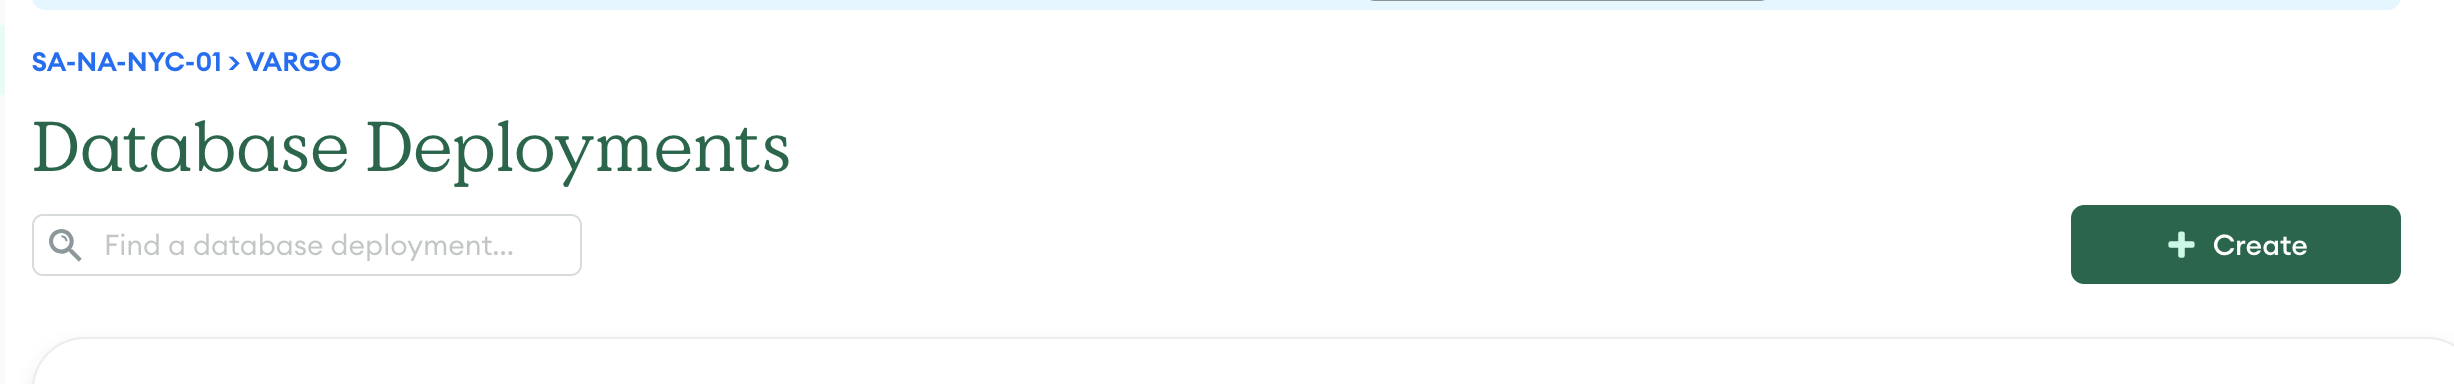

In [65]:
#screenshots
from IPython import display
print("Atlas UI Creation button")
display.Image("../../_imagesForCerts/createButton.png")

Add DB User and Network WhiteList


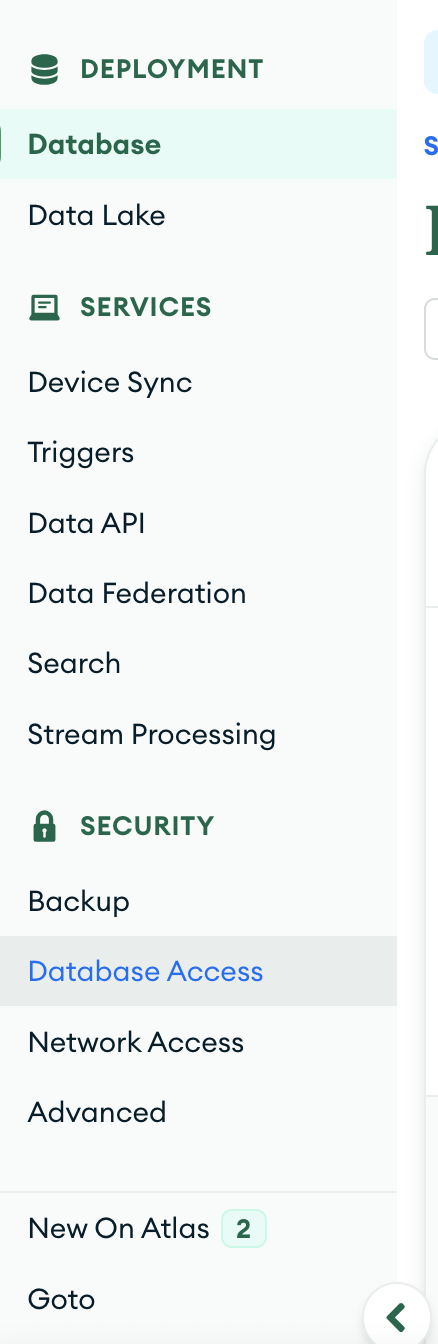

In [6]:
print("Add DB User and Network WhiteList")
display.Image("../../_imagesForCerts/sidebarDbUser.png")

Load Sample Data -- you can also see the Connect Button next to the name of the cluster


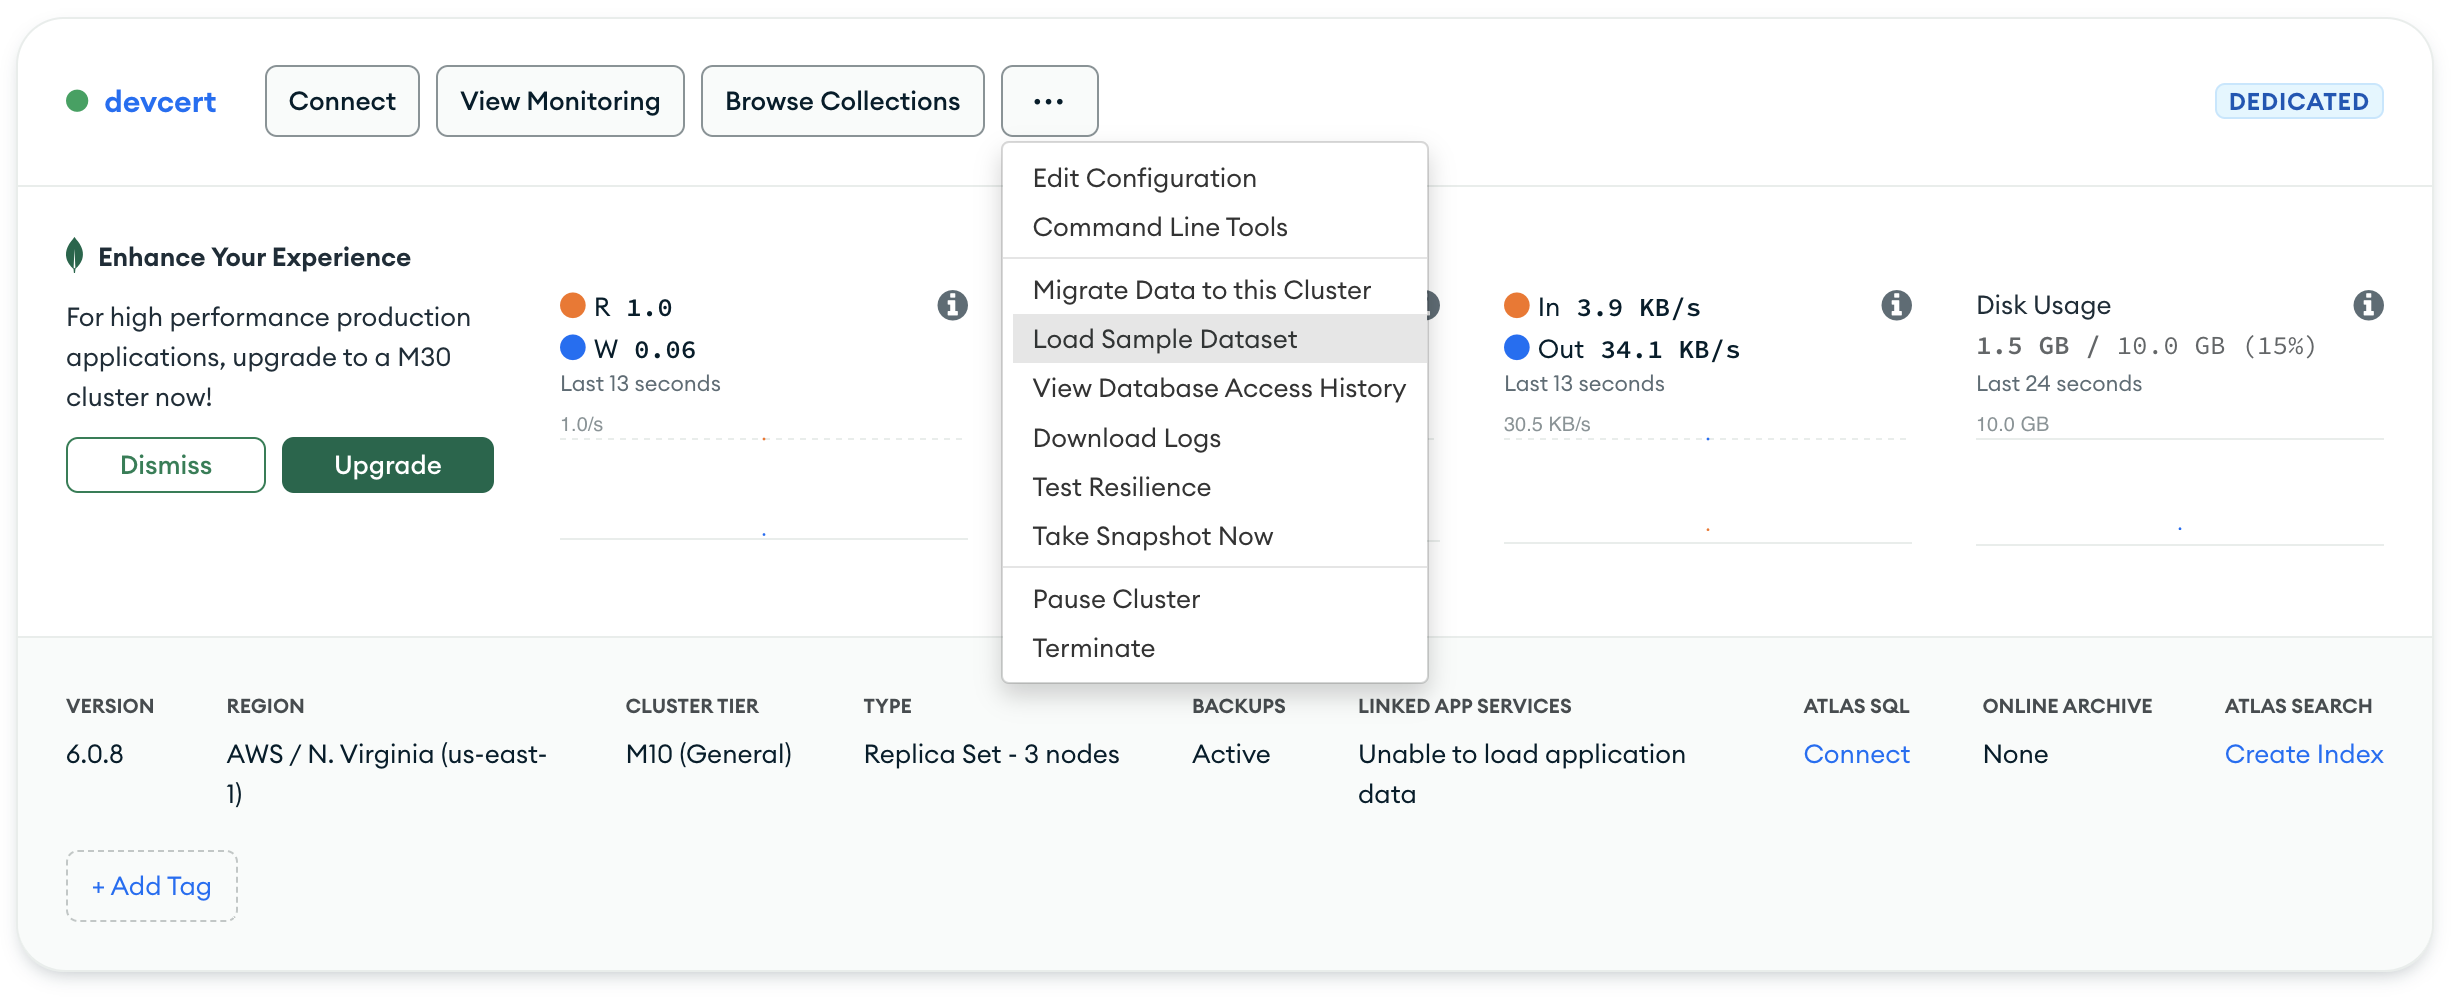

In [9]:
print("Load Sample Data -- you can also see the Connect Button next to the name of the cluster")
display.Image("../../_imagesForCerts/loadSampleData.png")

... OK! 

So, we have a cluster (in Atlas), a user (with read/write any database priviledges), a password, an IP whitelist, and sample data.

Now, lets ensure that you have connectivity to the database by running the mongo shell equivalent of "Hello World," db.hello().

In the cell below, enter your username and password that you created to authenticate against the database, and replace the connection string variable with the shell connection string from your Atlas UI. In order to find that connection string, find the cluster in your Atlas project UI, click "Connect" on it, choose "Shell" as connection method.

**If you change these variables, make sure to RUN THE CELL or they won't be reassigned**


In [19]:
# Variables
mongoDB_username = ""
mongoDB_password = ""
mongoDB_connection_string = ""

In [20]:
!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "db.hello()" 

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  topologyVersion: {
    processId: ObjectId("64c904b0e38636f5f6d97611"),
    counter: Long("6")
  },
  hosts: [
    'devcert-shard-00-00.6ngvd.mongodb.net:27017',
    'devcert-shard-00-01.6ngvd.mongodb.net:27017',
    'devcert-shard-00-02.6ngvd.mongodb.net:27017'
  ],
  setName: 'atlas-vnu7kz-shard-0',
  setVersion: 1,
  isWritablePrimary: true,
  secondary: false,
  primary: 'devcert-shard-00-01.6ngvd.mongodb.net:27017',
  tags: {
    workloadType: 'OPERATIONAL',
    region: 'US_EAST_1',
    nodeType: 'ELECTABLE',
    provider: 'AWS'
  },
  me: 'devcert-shard-00-01.6ngvd.mongodb.net:27017',
  electionId: ObjectId("7fffffff0000000000000004"),
  lastWrite: {
    opTime: { ts: Timestamp({ t: 1690897038, i: 6 }), t: Long("4") },
    lastWriteDate: ISODate("2023-08-01T13:37:18.000Z"),
    majorityOpTime: { ts: Timestamp({ t: 1690897038, i: 6 }), t: Long("4") },
    majorityWriteDate: ISODate("2023-08-01T13:37:18.000Z")


## Mongosh

Mongosh is the official mongo shell. Knowing how to install it and the connection flags is not a major focus of the developer certification. However, for a **vast majority** of the questions on the developer exam, the exam will use mongo shell format. So understanding the shell at a high level is crucial for doing well on the certification test. Luckily, the shell is very similar to any langauge specific implementation of MongoDB. My suggestion as you learn is to start in the mongo shell, then learn language specific topics, such as connecting to the database and iterating through a cursor.

In the above example, we use the `--eval` flag to pass in a shell command (in this case it was `db.hello()`). The mongo shell is a javascript interpreter, so many shell commands look like javascript. In the shell, the `db` object represents the current database context. Because we didn't specify the database in the connection string, it uses the default, `test`.

`db.hello()` returns basic information about the mongoDB cluster. If you are connecting to a replica set, note that there are multiple hosts in the `hosts` array. This shows that MongoDB is replicating your data, but this won't come up on the developer exam.

MongoDB also offers a free GUI for the MongoDB database called [Compass](https://www.mongodb.com/products/compass). It is free to download and use. It also has an embedded Mongosh

**If possible I recommend downloading and installing the mongo shell or MongoDB Compass for the sake of this class. If that is is not possible, you can use the notebooks with mongosh from this host**



## The Document Model

We have deployed a MongoDB database, and figured out how to access it (shell or compass). Now, lets become MongoDB Developers!!

The first thing that comes to mind for most people when they think MongoDB is the document model. It's of the most important features of MongoDB. Knowing about the document model is very important for getting certified as a MongoDB Developer.

Lets Look at a document. For those interested in the query, first we change our context to the database `sample_mflix` by entering `use sample_mflix` then we return a single document (record) from the `movies` collection (collection = MongoDB's version of a table) by entering `db.movies.findOne()` 

In [14]:
!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval "db.movies.findOne()"

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  _id: ObjectId("573a1390f29313caabcd42e8"),
  plot: 'A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.',
  genres: [ 'Short', 'Western' ],
  runtime: 11,
  cast: [
    'A.C. Abadie',
    "Gilbert M. 'Broncho Billy' Anderson",
    'George Barnes',
    'Justus D. Barnes'
  ],
  poster: 'https://m.media-amazon.com/images/M/MV5BMTU3NjE5NzYtYTYyNS00MDVmLWIwYjgtMmYwYWIxZDYyNzU2XkEyXkFqcGdeQXVyNzQzNzQxNzI@._V1_SY1000_SX677_AL_.jpg',
  title: 'The Great Train Robbery',
  fullplot: "Among the earliest existing films in American cinema - notable as the first film that presented a narrative story to tell - it depicts a group of cowboy outlaws who hold up a train and rob the passengers. They are then pursued by a Sheriff's posse. Several scenes have color included - all hand tinted.",
  languages: [ 'English' ],
  released: ISODate("1903-12-01T00:00:00.000Z"),
  directors: [ 'E

- Documents are comprised of key:value pairs (we sometimes call this "self describing") NOT rows and columns
- A value might be a scalar value (like year:1903) or a data structure (like awards, which is a sub document)
- There is no limit to how far you can nest data in a document, however a single document cannot exceed 16MB
- Look at the "released" field. That is an ISODate() data type. 
- MongoDB does NOT store JSON data!! MongoDB stores BSON data, which means it can enforce typing
- **acceptable BSON types will appear on the MongoDB Certification exam, so you should memorize** [List Here](https://www.mongodb.com/docs/manual/reference/bson-types/)
- Documents are polymorphic - not all documents need to have all the same fields
- All documents must have a _id.
- The _id will be auto generated if not included in the write (ObjectID Bson type)


## Intro to CRUD - Inserts

It makes sense to start with inserts because it doesn't involve a filter. MongoDB has a vast array of filtering capabilities that are meant for JSON-shaped data, and that will be the focus for future sessions. Mongosh has 2 main ways to insert documents into a collection:

- `db.<collection>.insertOne({key:value},{options})` Insert, which takes as an argument a single document to insert
- `db.<collection>.insertMany([{k:v},{k:v}],{options})` InsertMany, which accepts an array of documents

The `{options}` object allow users to configure the nature of inserts. The main option to consider is with `insertMany` - it is ordering. If `{ordered:true}`, a failed insert will stop the operation.

Let's look at some inserts:

In [60]:
insertString = "db.testCollection.insertOne({a:1})"

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use testDb" \
--eval "{insertString}"

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  acknowledged: true,
  insertedId: ObjectId("64c914dfc8497aa3be247f07")
}


In [61]:
insertString = "db.testCollection.insertOne({a:ISODate('2020-12-30')})"

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use testDb" \
--eval "{insertString}"

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  acknowledged: true,
  insertedId: ObjectId("64c914e41ea8550dfd3146e5")
}


In [62]:
insertString = "db.testCollection.insertMany([{a:2},{a:3},{a:4}])"

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use testDb" \
--eval "{insertString}"

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  acknowledged: true,
  insertedIds: {
    '0': ObjectId("64c914ec98ce2690fafa7c7c"),
    '1': ObjectId("64c914ec98ce2690fafa7c7d"),
    '2': ObjectId("64c914ec98ce2690fafa7c7e")
  }
}
